In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
# Notebook Styling 
sns.set()
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

DATA_DIR = os.path.join('..', 'data')

In [3]:
dem_primary_path = os.path.join(DATA_DIR, '2016_dem_primary.csv')
dem_df = pd.read_csv(dem_primary_path)

In [4]:
dem_df.head(2)

,date,state,HRC_votes,BS_votes,HRC_del,BS_del
0,2/1/2016,IA,NaN,NaN,23,21
1,2/9/2016,NH,95355.0,152193.0,9,15


In [5]:
dem_df['date'] = pd.to_datetime(dem_df['date'], format='%m/%d/%Y')

In [6]:
dem_df.sort_values(by=['date', 'state'], ascending=[True, True], inplace=True)

In [7]:
dem_df.head(2)

,date,state,HRC_votes,BS_votes,HRC_del,BS_del
0,2016-02-01,IA,NaN,NaN,23,21
1,2016-02-09,NH,95355.0,152193.0,9,15


In [11]:
dem_won_states = ['CA','CO','CT','DE','HI','IL','ME','MA','MN','NV',
                  'NH','NJ','NM','NY','OR','RI','VT','VA','WA']
rep_won_states = ['AL','AK','AZ','AR','FL','GA','ID','IN','IA','KS',
                  'KY','LA','MI','MS','MO','MT','NE','NC','ND','OH',
                  'OK','PA','SC','SD','TN','UT','WV','WI','WY']

In [8]:
dem_df['HRC_total_votes'] = dem_df['HRC_votes'].cumsum() / 1000000
dem_df['BS_total_votes'] = dem_df['BS_votes'].cumsum() / 1000000
dem_df['HRC_total_del'] = dem_df['HRC_del'].cumsum()
dem_df['BS_total_del'] = dem_df['BS_del'].cumsum()

In [21]:
dem_df['HRC_total_votes_dem_won'] = dem_df.loc[(dem_df['state'].isin(dem_won_states)) & 
                                               (dem_df['HRC_votes'].notnull()) & 
                                               (dem_df['BS_votes'].notnull()), 'HRC_votes'].cumsum() / 1000000
dem_df['BS_total_votes_dem_won'] = dem_df.loc[(dem_df['state'].isin(dem_won_states)) & 
                                               (dem_df['HRC_votes'].notnull()) & 
                                               (dem_df['BS_votes'].notnull()), 'BS_votes'].cumsum() / 1000000
dem_df['HRC_total_votes_repub_won'] = dem_df.loc[(dem_df['state'].isin(rep_won_states)) & 
                                                 (dem_df['HRC_votes'].notnull()) & 
                                                 (dem_df['BS_votes'].notnull()), 'HRC_votes'].cumsum() / 1000000
dem_df['BS_total_votes_repub_won'] = dem_df.loc[(dem_df['state'].isin(rep_won_states)) & 
                                                (dem_df['HRC_votes'].notnull()) & 
                                                (dem_df['BS_votes'].notnull()), 'BS_votes'].cumsum() / 1000000

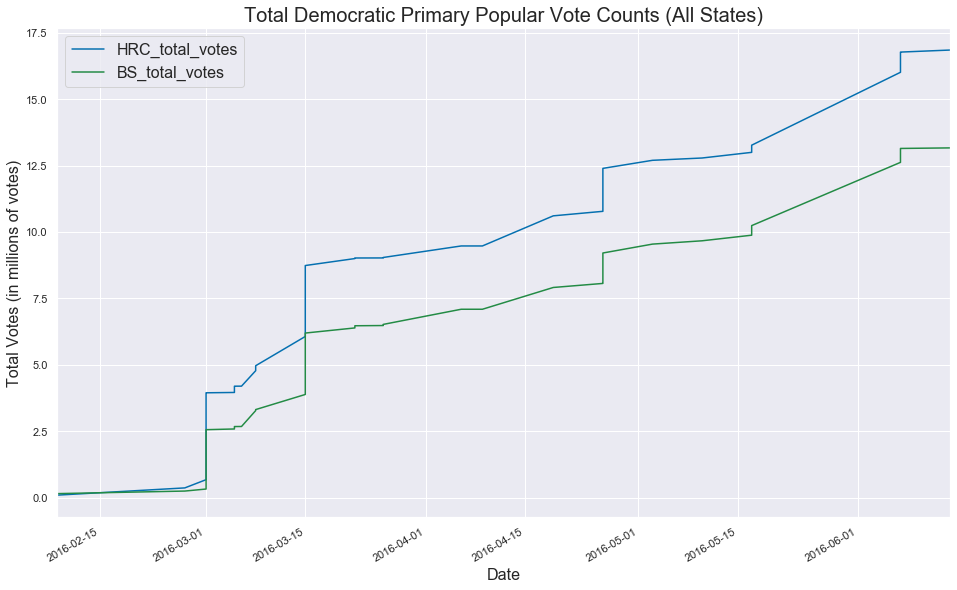

In [16]:
figsize=(16,10)
fig, ax = plt.subplots(sharex=True, figsize=figsize)

plot_df = dem_df.loc[(dem_df['HRC_votes'].notnull()) & 
                     (dem_df['BS_votes'].notnull())].copy()

ax = plot_df.plot(x='date', y='HRC_total_votes', color='#0570b0', ax=ax)
ax = plot_df.plot(x='date', y='BS_total_votes', color='#238b45', ax=ax)
ax.set_ylabel('Total Votes (in millions of votes)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Total Democratic Primary Popular Vote Counts (All States)', fontsize=20)
ax.legend(fontsize=16)
plt.savefig(os.path.join('..','output', 'total_votes_all_states.png'))

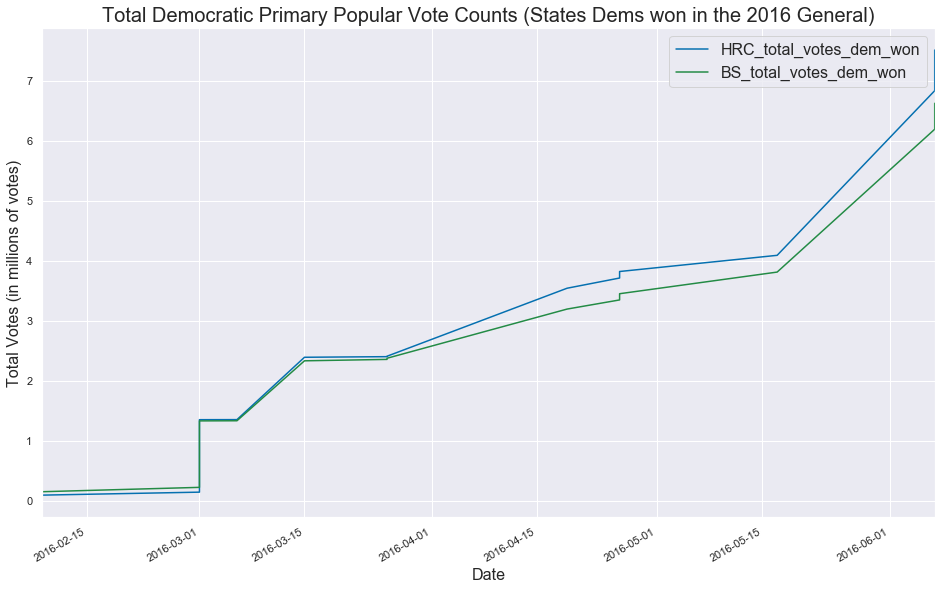

In [22]:
figsize=(16,10)
fig, ax = plt.subplots(sharex=True, figsize=figsize)

plot_df = dem_df.loc[(dem_df['HRC_votes'].notnull()) & 
                     (dem_df['BS_votes'].notnull()) & 
                     (dem_df['state'].isin(dem_won_states))].copy()

ax = plot_df.plot(x='date', y='HRC_total_votes_dem_won', color='#0570b0', ax=ax)
ax = plot_df.plot(x='date', y='BS_total_votes_dem_won', color='#238b45', ax=ax)
ax.set_ylabel('Total Votes (in millions of votes)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Total Democratic Primary Popular Vote Counts (States Dems won in the 2016 General)', fontsize=20)
ax.legend(fontsize=16)
plt.savefig(os.path.join('..','output', 'total_votes_dem_won_2016_states.png'))

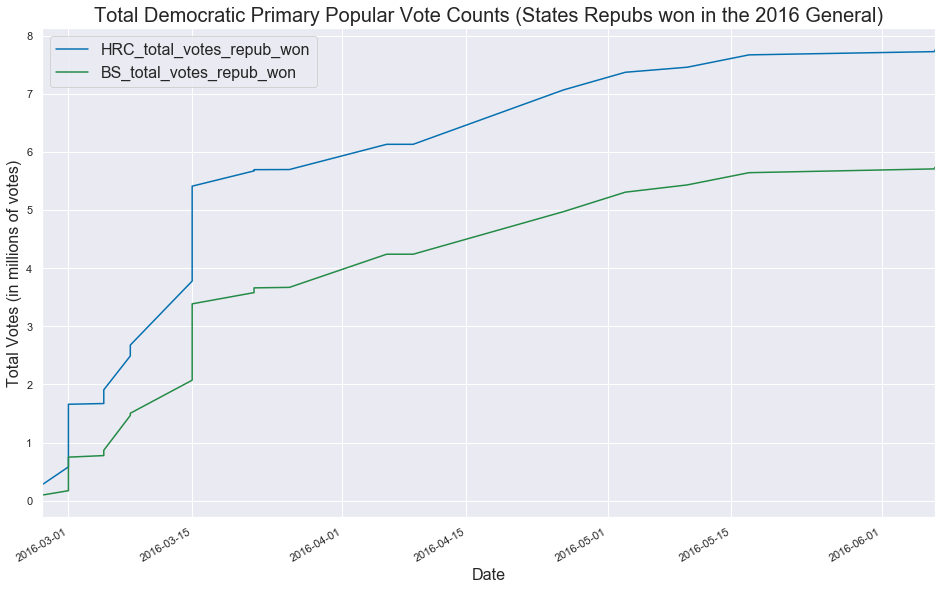

In [23]:
figsize=(16,10)
fig, ax = plt.subplots(sharex=True, figsize=figsize)

plot_df = dem_df.loc[(dem_df['HRC_votes'].notnull()) & 
                     (dem_df['BS_votes'].notnull()) & 
                     (dem_df['state'].isin(rep_won_states))].copy()

ax = plot_df.plot(x='date', y='HRC_total_votes_repub_won', color='#0570b0', ax=ax)
ax = plot_df.plot(x='date', y='BS_total_votes_repub_won', color='#238b45', ax=ax)
ax.set_ylabel('Total Votes (in millions of votes)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Total Democratic Primary Popular Vote Counts (States Repubs won in the 2016 General)', fontsize=20)
ax.legend(fontsize=16)
plt.savefig(os.path.join('..','output', 'total_votes_rep_won_2016_states.png'))

In [24]:
dem_df.head(2)

,date,state,HRC_votes,BS_votes,HRC_del,BS_del,HRC_total_votes,BS_total_votes,HRC_total_del,BS_total_del,HRC_total_votes_dem_won,BS_total_votes_dem_won,HRC_total_votes_repub_won,BS_total_votes_repub_won
0,2016-02-01,IA,NaN,NaN,23,21,NaN,NaN,23,21,NaN,NaN,NaN,NaN
1,2016-02-09,NH,95355.0,152193.0,9,15,0.095355,0.152193,32,36,0.095355,0.152193,NaN,NaN


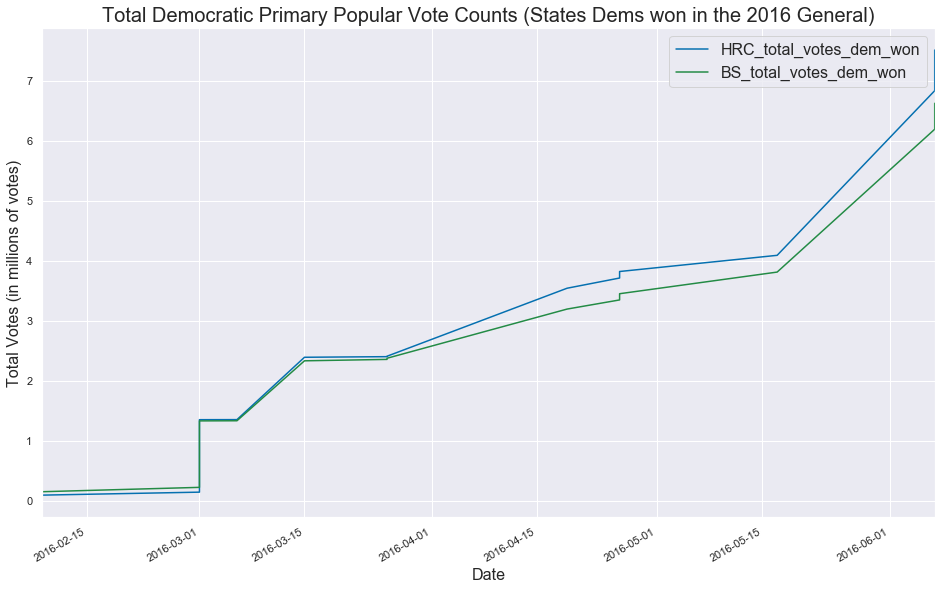

In [22]:
figsize=(16,10)
fig, ax = plt.subplots(sharex=True, figsize=figsize)

plot_df = dem_df.loc[(dem_df['HRC_votes'].notnull()) & 
                     (dem_df['BS_votes'].notnull()) & 
                     (dem_df['state'].isin(dem_won_states))].copy()

ax = plot_df.plot(x='date', y='HRC_total_votes_dem_won', color='#0570b0', ax=ax)
ax = plot_df.plot(x='date', y='BS_total_votes_dem_won', color='#238b45', ax=ax)
ax.set_ylabel('Total Votes (in millions of votes)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Total Democratic Primary Popular Vote Counts (States Dems won in the 2016 General)', fontsize=20)
ax.legend(fontsize=16)
plt.savefig(os.path.join('..','output', 'total_votes_dem_won_2016_states.png'))